most of the content taken from https://www.udemy.com/course/time-series-analysis-in-python/


# Imports

In [59]:
from IPython.display import YouTubeVideo
import pandas as pd
import scipy.stats
#import pylab
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
from pytablewriter import MarkdownTableWriter


In [3]:
#video link variables
video_likelihood=YouTubeVideo('XepXtl9YKwc')

# Concepts

## likelihood &AIC-BIC

**likelihood function $\mathcal {L}$**

Maximum lkelihood estimation is a method that determines values for the parameters of a model. The parameter values are 
found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data.

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

C:\Users\DELL\OneDrive\Documents\Data science\udemy\Time Series Analysis in Python\References\Maximum_likeyhood_explanatin.pdf



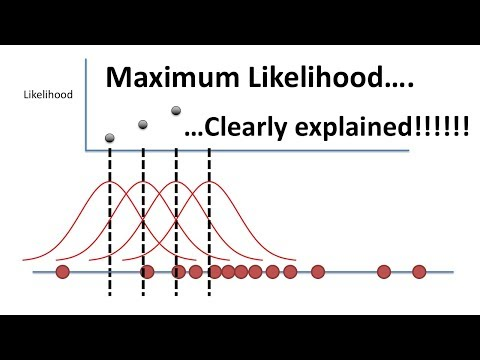

In [4]:
display(video_likelihood)



**What is AIC ? BIC?**

So the "IC"s are information criterion. They measure how much information the model needs, in order to 
estimate the coefficient values. 
Here are the formulas for the two and what each term 

***AIC:Akaike’s Information Criteria***

AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

Let k be the number of estimated parameters in the model. Let $\hat L$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following

$\mathrm {AIC} \,=\,2k-2\ln({\hat {L}})$

BIC:Bayesian Information 

In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models;
 models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).


 The BIC is formally defined as

$\mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}}).\ $

## Timeseries
Time series is a sequence of information which attaches a time period to each value.

let X be timeseries variable to denote the value at a period t we use the notation X<sub>t</sub>

simillarly to get the previous period we use the notation X<sub>t-1</sub>

* Adjust the freqeuncy:Havign daily data but need to compute on Monthyly and vice versa

* Missing values :

* Order is important:you cannnot use train test spllit 

* Doesnot follow any standard Distriubtions



### QQplot

The quanti quintile Plott or Cucu Plott for short is a tool used in analytics to determine whether a
data set is distributed a certain way.

Unless specified otherwise, the Cucu plot showcases how the data fits a normal distribution.

* X-axis:
         The X axis represents the theoretical quintiles of the data set.Another explanation for the latter is how many standard deviations away from the mean these values are.
* Y-axis:the price with the highest ones at the top and the lowest at the bottom.
* redline :The red diagonal line on the screen represents what the data points should follow if they are normally

In [7]:
df_cmp=pd.read_excel(r"Index2018.xlsx")

In [8]:
#scipy.stats.probplot(df_cmp.spx,plot=pylab,)
#pylab.show()
                    

### Handling timeseries data

#### Setting the Frequency

In [9]:
df_cmp['date']=pd.to_datetime(df_cmp['date'],dayfirst=True)

In [10]:
df_cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [11]:
df_cmp['date'].describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3927294121.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cmp['date'].describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [12]:
df_cmp.set_index('date',inplace=True)

the data available on business days & if we try to set the freq as 'daily' then it generates new records
- df_cmp.asfreq('d')
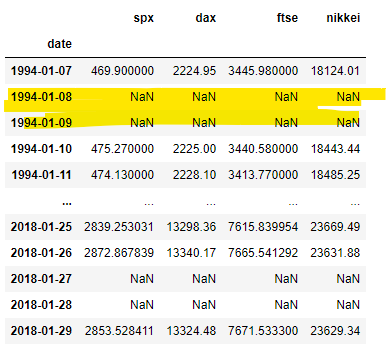
therefore we should not set the frequency 'daily' and do it on businessdays with 'b' parameter

In [13]:

df_cmp=df_cmp.asfreq('b')

#### Filling the missing values

In [14]:
df_cmp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Different filling methods
- Forword filling 
- Backward filling
- average of dataset
- etc..

In [15]:
df_cmp['spx']=df_cmp['spx'].fillna(method="ffill")
df_cmp['ftse']=df_cmp['ftse'].fillna(method="ffill")

In [16]:
df_cmp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [17]:
df_cmp.dax=df_cmp.dax.fillna(value=df_cmp.dax.mean)

In [18]:
df_cmp.nikkei=df_cmp.nikkei.fillna(0)

In [19]:
### removing unnecessary columns 
del df_cmp['dax'],df_cmp['ftse'],df_cmp['nikkei']

In [20]:
df_cmp.rename(columns={'spx':'market_value'},inplace=True)

In [21]:
df_cmp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


#### Splitting the data

In [22]:
#lets keep 80% records as train set and remaining in test set
train_size=int(len(df_cmp)*0.8)

In [23]:
df_cmp_train=df_cmp.iloc[:train_size]

In [24]:
df_cmp_test=df_cmp.iloc[train_size:]

### working with Timeseries

#### Whitenoise 


White Noise is a special type of time series where the data doesn't follow a pattern.

In this case, since no pattern can be found, we can't predict white noise additionally, in order

to consider a series as white noise.

It needs to satisfy the following three conditions by having 

- a constant mean $\mu$, 
- a constant variance $\sigma$<sup>2</sup> and
- no autocorrelation in any period.

Let's start by generating the White Noise series and storing the values in a variable called W.M.,

In [25]:
wn=np.random.normal(loc=df_cmp_train.market_value.mean(),scale=df_cmp_train.market_value.std(),size=len(df_cmp_train))

In [26]:
df_cmp_train['wn']=wn


C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\200594349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmp_train['wn']=wn


In [27]:
df_cmp_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1085.777577
std,292.559287,293.448156
min,438.920000,48.605097
25%,914.620000,888.760128
50%,1144.650000,1083.740109
75%,1316.280729,1287.265128
max,1570.252238,2182.967205


lets check the constaint mean & variance ..To do this lets split the df into three parts and see whats their 
mean and variance

In [28]:
split_3=int(len(df_cmp_train)/3)

In [29]:
df_mean_1,df_mean_2,df_mean_3=df_cmp_train.iloc[:split_3],df_cmp_train.iloc[split_3:split_3+split_3],df_cmp_train.iloc[split_3+split_3:]

In [30]:
print(f"mean& variance 1st timeseries mean={df_mean_1.wn.mean()}variance= {df_mean_1.wn.std()} len={df_mean_1.shape[0]}")
print(f"mean& variance 2nd timeseries mean={df_mean_2.wn.mean()}variance= {df_mean_2.wn.std()} len={df_mean_2.shape[0]}")
print(f"mean& variance 3rd timeseries mean={df_mean_3.wn.mean()}variance= {df_mean_3.wn.std()} len={df_mean_3.shape[0]}")

mean& variance 1st timeseries mean=1084.5954906607178variance= 294.73441862546093 len=1673
mean& variance 2nd timeseries mean=1082.0606361214386variance= 293.8092158933867 len=1673
mean& variance 3rd timeseries mean=1090.6707538018209variance= 291.9042727076845 len=1675


So from definition first two conditions are satisified which are constant mean and variance across timeseries

Lets take a look at how the whist noise looks on the plot

Text(0.5, 1.0, 'White noise')

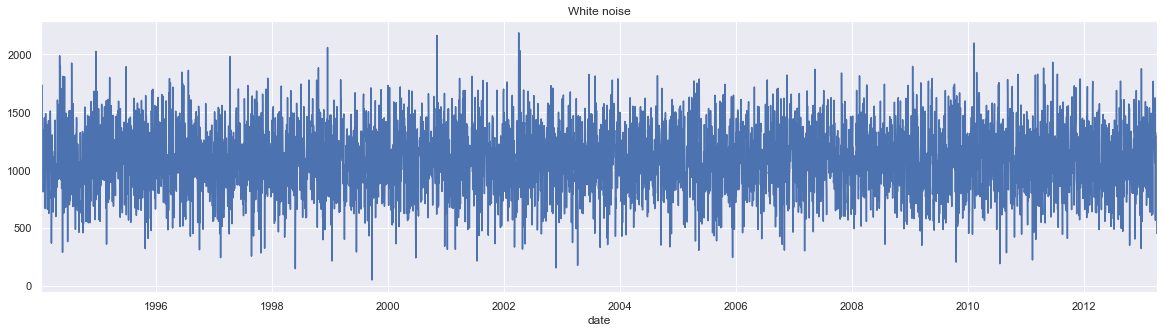

In [31]:
df_cmp_train['wn'].plot(figsize=(20,5))
plt.title('White noise')

(0.0, 2300.0)

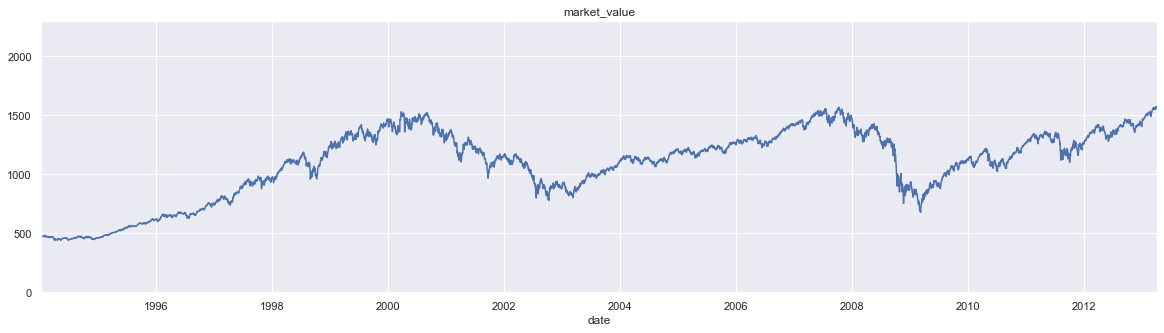

In [32]:
df_cmp_train['market_value'].plot(figsize=(20,5))
plt.title('market_value')
plt.ylim(0,2300)

#### Randomwalk

A random walk is a special type of time series where values tend to persist over time and the differences

between periods are simply white noise.

Lets P be the observed target variable and $\epsilon$<sub>t</sub> is a residula (whistenoise)then 

P<sub>t</sub> = P<sub>t-1</sub>+$\epsilon$<sub>t</sub>

P<sub>t-1</sub>=P<sub>t-2</sub>+$\epsilon$<sub>t-1</sub>

if we repeat until the last point in timeseries

P<sub>t</sub>=($\epsilon$<sub>t</sub>+$\epsilon$<sub>t-1</sub>+$\epsilon$<sub>t-2</sub>+....$\epsilon$<sub>t-n</sub>)*B*



In [33]:
rw = pd.read_csv(r"RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [34]:
rw['price'].describe()

count    5021.000000
mean     1269.944293
std       444.216793
min       585.483034
25%       931.550429
50%      1156.363045
75%      1488.362029
max      2715.508720
Name: price, dtype: float64

In [35]:
df_cmp_train['rw'] = rw.price

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1703576627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmp_train['rw'] = rw.price


In [36]:
#Lets the check the mean of random walk
df_mean_1,df_mean_2,df_mean_3=df_cmp_train.iloc[:split_3],df_cmp_train.iloc[split_3:split_3+split_3],df_cmp_train.iloc[split_3+split_3:]

In [37]:
print(f"mean& variance 1st timeseries mean={df_mean_1.rw.mean()}variance= {df_mean_1.rw.std()} len={df_mean_1.shape[0]}")
print(f"mean& variance 2nd timeseries mean={df_mean_2.rw.mean()}variance= {df_mean_2.rw.std()} len={df_mean_2.shape[0]}")
print(f"mean& variance 3rd timeseries mean={df_mean_3.rw.mean()}variance= {df_mean_3.rw.std()} len={df_mean_3.shape[0]}")

mean& variance 1st timeseries mean=1003.7900464774663variance= 186.9690790993821 len=1673
mean& variance 2nd timeseries mean=1029.5446763526593variance= 208.97385801566963 len=1673
mean& variance 3rd timeseries mean=1775.893316721791variance= 358.50495109664024 len=1675


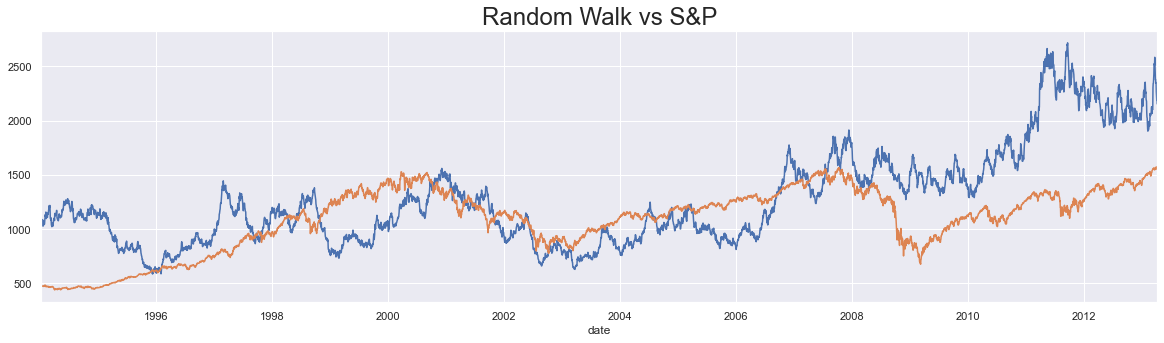

In [38]:
df_cmp_train.rw.plot(figsize = (20,5))
df_cmp_train.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

#### stationarity

time series stationary implies that taking consecutive samples of data with the same size should have

identical covariance regardless of the starting point.

- Constant mean

- Constant Variance

- consistent covariance between periods at an identical distance

Cov(x<sub>n</sub>,x<sub>n+k</sub>)= Cov(x<sub>m</sub>,x<sub>m+k</sub>)

In other words, we want to have the same covariance between the first and fourth period as we do for

the third and sixth since they are three intervals apart.

Cov(x<sub>1</sub>,x<sub>4</sub>)= Cov(x<sub>3</sub>,x<sub>6</sub>)



we run Dickie Fuller test to see if the timeseries is stationary or not

H<sub>0</sub>:$\phi$<1

H<sub>1</sub>:$\phi$=1

test statistic<Criticalvalue =>reject the hypothesis =>stationary

In [39]:
sts.adfuller(df_cmp_train.market_value)


(-1.7369847452352465,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [40]:
print(
    f"test statistic < critical value={sts.adfuller(df_cmp_train.market_value)[0]<sts.adfuller(df_cmp_train.market_value)[4]['10%']}")

test statistic < critical value=False


| Value      | parameter |
| ----------- | ----------- |
| -1.7369847452352465     | Test statistic       |
| 0.4121645696770607   | P-value        |
|18                    |No.of lags used in the regression|
|5002|total noof observation|
|'1%': -3.431658008603046|1% critical value|
|39904.880607487445|Maximum liklyhood information critiera|

In [41]:
sts.adfuller(df_cmp_train.wn)

(-35.97640411464923,
 0.0,
 3,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 70845.69843028173)

In [42]:
print(
    f"test statistic < critical value={sts.adfuller(df_cmp_train.wn)[0]<sts.adfuller(df_cmp_train.wn)[4]['10%']}")

test statistic < critical value=True


#### Seasonality

Well, seasonality suggests that certain trends will appear on a cyclical basis.

One approach is to decompose the sequence where we split up the TIME series into three effects trend,

seasonal and residual.

Of course, the trend represents the pattern consistent throughout the data.

Seasonal expresses all cyclical effects due to seasonality.

Finally, the residuals are the error of prediction or the difference between the actual data and the

The simplest type of decomposition is called naïf with naïf decomposition.

We expect a linear relationship between the three parts and the observed Time series.

Now let's pay attention to the two main approaches to naïf decomposition additive or multiplicative.

- Additive assumes that for any time period, the observed value is the sum of the trend, seasonal and

residual for that period.

- Similarly, the multiplicative decomposition assumes the original series is a product of the trend,

seasonal and residual values.



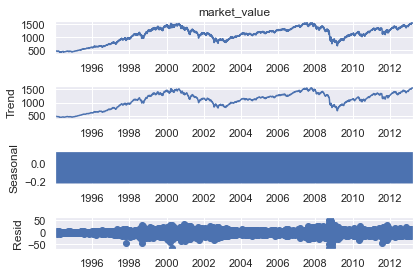

In [43]:
s_dec_additive = seasonal_decompose(df_cmp_train.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

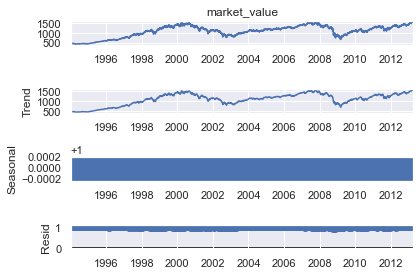

In [44]:
s_dec_multiplicative = seasonal_decompose(df_cmp_train.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

#### Correlation between past and present values

#### Auto correlation function

X<sub>t-1</sub> ->X<sub>t</sub>

+

X<sub>t-2</sub> ->X<sub>t</sub>

+

X<sub>t-3</sub> ->X<sub>t</sub>

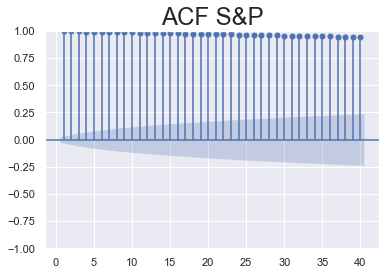

In [45]:
sgt.plot_acf(df_cmp_train.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

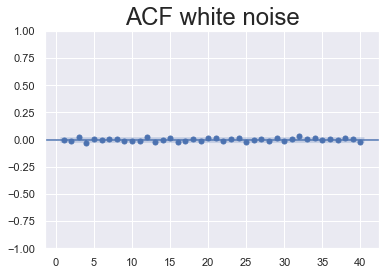

In [46]:
sgt.plot_acf(df_cmp_train.wn, lags = 40, zero = False)
plt.title("ACF white noise", size = 24)
plt.show()

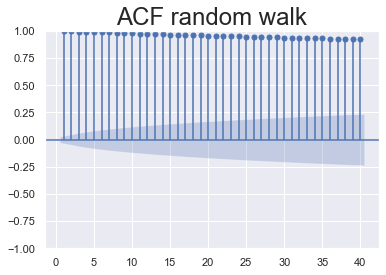

In [47]:
sgt.plot_acf(df_cmp_train.rw, lags = 40, zero = False)
plt.title("ACF random walk", size = 24)
plt.show()

#### Partial Auto Correlation function

PCF checks the correlation between a previous period and present period and cancels out the between correlations

X<sub>t-1</sub> ->X<sub>t</sub>


X<sub>t-2</sub> ->X<sub>t</sub>



X<sub>t-n</sub> ->X<sub>t</sub>

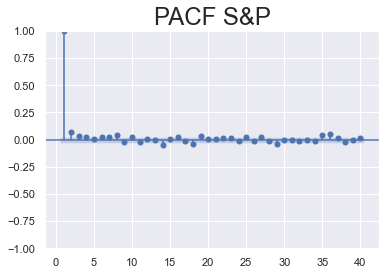

In [48]:
sgt.plot_pacf(df_cmp_train.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

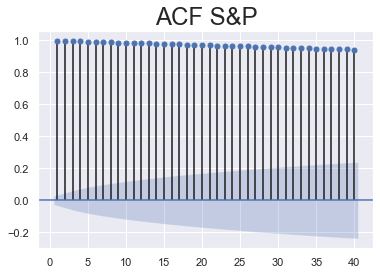

## Models

### AR model-Non Stationary data

It's a linear model where current period values are a sum of past outcomes multiplied by a numeric factor.

x<sub>t</sub>=C+$\phi$x<sub>t-1</sub>+$\epsilon$<sub>t</sub>

-1<=$\phi$<=1

why?

lets take $\phi$=1.3 adn c=0
then

x2=x1*1.3
x3=x2*1.3=x1*1.3*1.3
x4=x3*1.3=x1*1.3*1.3*1.3
for large time series this would be resulting very large values

A model with Two lags would like this

x<sub>t</sub>=c+$\phi$<sub>1</sub>x<sub>t-1</sub>+$\phi$<sub>2</sub>x<sub>t-2</sub>+$\epsilon$<sub>t</sub>

If we include more lags then the model gets complicated

In [49]:
raw_csv_data =pd.read_excel(r"Index2018.xlsx")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#### The ACF

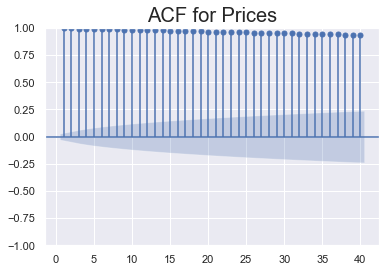

In [50]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

#### The PACF

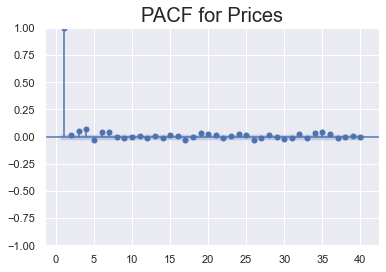

In [51]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

In [61]:
model_ar = ARIMA(df.market_value, order=(1,0,0))

In [62]:
results_ar = model_ar.fit()

In [63]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Mon, 23 May 2022   AIC                          55251.207
Time:                        23:52:07   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.927    5919.348
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

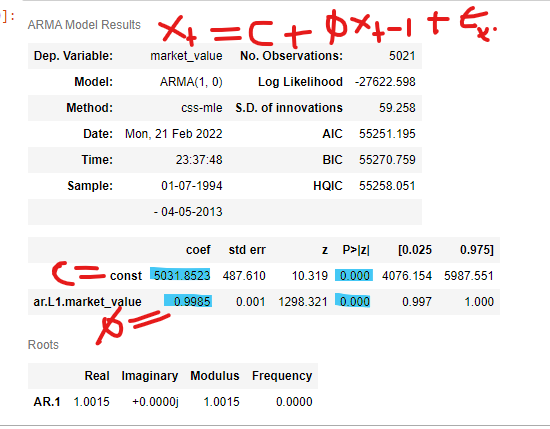

#### Higher-Lag AR Models

In [64]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Mon, 23 May 2022   AIC                          55251.898
Time:                        23:52:23   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

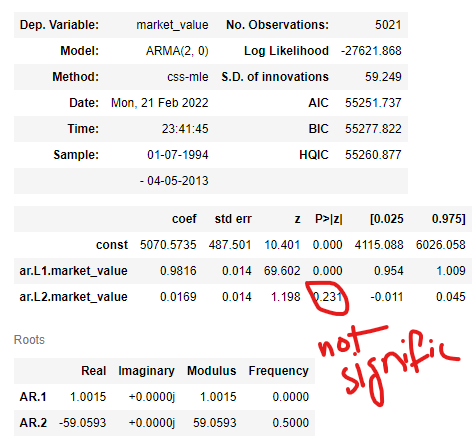

In [65]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Mon, 23 May 2022   AIC                          55241.925
Time:                        23:52:33   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Mon, 23 May 2022   AIC                          55217.359
Time:                        23:52:43   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### LLR test

In [67]:
#DF =number of parameters difference between firstparameter and second parameter
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [68]:
LLR_test(model_ar_2,model_ar_3)
##0.001 whichc suggests AR(3) better than AR(2)

0.001

In [69]:
LLR_test(model_ar_3,model_ar_4)
##0.001 whichc suggests AR(4) better than AR(3)

0.0

In [70]:
model_ar_7 = ARIMA(df.market_value, order=[7,0,0])
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Mon, 23 May 2022   AIC                          55202.044
Time:                        23:53:04   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.381     12.555      0.000    4295.110    5884.172
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.029      -0.058      -0.003
ar.L3         -0.0267      0.013     -2.108      0.035      -0.052      -0.002
ar.L4          0.1039      0.013      8.053      0.000       0.079       0.129
ar.L5         -0.0668      0.012     -5.480      0.000      -0.091      -0.043
ar.L6         -0.0025      0.013     -0.199      0.842      -0.028       0.022
ar.L7          0.0427      0.010      4.397      0.000       0.024       0.062
sigma2      3471.0296     42.068     82.510      0.000    3388.578    3553.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3013.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model_ar_8 = ARIMA(df.market_value, order=[8,0,0])
results_ar_8 = model_ar_8.fit()
results_ar_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Mon, 23 May 2022   AIC                          55203.708
Time:                        23:53:11   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.460    5887.822
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.029      -0.058      -0.003
ar.L3         -0.0273      0.013     -2.121      0.034      -0.053      -0.002
ar.L4          0.1047      0.013      7.984      0.000       0.079       0.130
ar.L5         -0.0670      0.012     -5.497      0.000      -0.091      -0.043
ar.L6         -0.0028      0.013     -0.216      0.829      -0.028       0.022
ar.L7          0.0505      0.014      3.598      0.000       0.023       0.078
ar.L8         -0.0080      0.010     -0.815      0.415      -0.027       0.011
sigma2      3471.3457     42.181     82.296      0.000    3388.672    3554.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3003.28
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
LLR_test(model_ar_7,model_ar_8)
#AR(8) not better than AR(7)

0.562

In [73]:
LLR_test(model_ar,model_ar_7,DF=6)
#AR(7) better than AR(1)

0.0

### AR model-Stationary data

In [74]:
raw_csv_data = pd.read_excel(r"Index2018.xlsx")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse

In [75]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [76]:
df['returns'] = df.market_value.pct_change(1).mul(100)
#since we are computing the difference between current and previosu value ,first occurence will not have any value to compare 
#therefore skipping the first record
df = df.iloc[1:]

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3426379090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [77]:
print(
    f"test statistic < critical value={sts.adfuller(df.returns)[0]<sts.adfuller(df.returns)[4]['10%']}")

test statistic < critical value=True


In [78]:
def adfuller_test(series):
    writer = MarkdownTableWriter(
        table_name="adfuller-output",
        headers=["parameter", "value"],
        value_matrix=[
            ["Test statistic", sts.adfuller(series)[0]],
            ["P-value", sts.adfuller(series)[1]],
            ["No.of lags used in the regression", sts.adfuller(series)[2]],
            ["total noof observation", sts.adfuller(series)[3]],
            ["1% critical value", sts.adfuller(series)[4]['1%']],
            ["5% critical value", sts.adfuller(series)[4]['5%']],
            ["Maximum likelihood", sts.adfuller(series)[5]],
        ],
    )
    return writer
# writer.write_table()

In [79]:
adfuller_test(df.returns)

c:\Users\DELL\anaconda3\envs\timeseries\lib\site-packages\pytablewriter\writer\text\_html.py:26: UserWarning: dependency packages for html not found.
you can install the dependencies with 'pip install pytablewriter[html]'

  warnings.warn(import_error_msg_template.format("html"))


ModuleNotFoundError: No module named 'dominate'

# adfuller-output
|            parameter            |          value          |
|---------------------------------|------------------------:|
|Test statistic                   |  -12.7702657194972210000|
|P-value                          |    0.0000000000000000000|
|No.of lags used in the regression|   32.0000000000000000000|
|total noof observation           | 4987.0000000000000000000|
|1% critical value                |   -3.4316619448857790000|
|5% critical value                |   -2.8621197374408225000|
|Maximum likelihood               |15696.7672456975010000000|

P-value is zero and Test statistic < Critical value therefore the timeseries is stationary

#### ACF

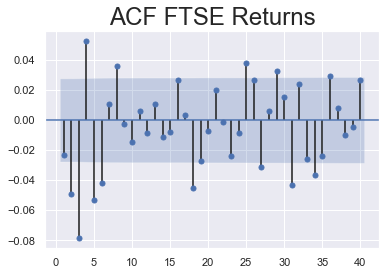

In [ ]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

#### PACF

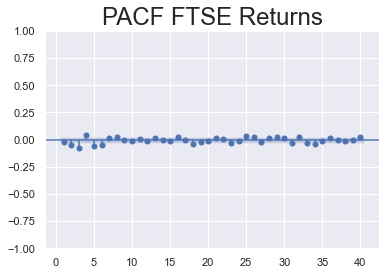

In [80]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

#### AR(1)

In [81]:
model_ret_ar_1 = ARIMA(df.returns, order = (1,0,0))

In [82]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [83]:
#coefficients are not significant
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Mon, 23 May 2022   AIC                          15865.497
Time:                        23:53:54   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### AR(2)

In [84]:
model_ret_ar_2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Mon, 23 May 2022   AIC                          15854.911
Time:                        23:54:04   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [86]:
model_ret_ar_3 = ARIMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Mon, 23 May 2022   AIC                          15823.477
Time:                        23:54:15   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [88]:
model_ret_ar_4 = ARIMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Mon, 23 May 2022   AIC                          15814.661
Time:                        23:54:27   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.0

In [89]:
model_ret_ar_6 = ARIMA(df.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Mon, 23 May 2022   AIC                          15789.890
Time:                        23:54:34   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.0

### AR Model:Residuals

In [90]:
df['resid']=results_ar_7.resid

In [92]:
adfuller_test(df['resid'])

parameter,value
Test statistic,-70.7990203383032200
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5019.0000000000000000
1% critical value,-3.4316535759402753
5% critical value,-2.8621160400844468
Maximum likelihood,54832.1640431705100000


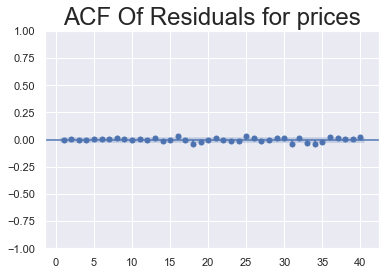

In [93]:
sgt.plot_acf(df.resid, zero = False, lags = 40)
plt.title("ACF Of Residuals for prices",size=24)
plt.show()

Residual is stationary and ACF plot confirms all the coefficeints are below the significant area therefore it confirms
out model is doing good.

Lets also do the residual analysis for lower AR model

In [94]:
df['resid1']=results_ar.resid

In [95]:
adfuller_test(df['resid1'])

parameter,value
Test statistic,-32.1629670217021400
P-value,0.0000000000000000
No.of lags used in the regression,5.0000000000000000
total noof observation,5014.0000000000000000
1% critical value,-3.4316548765428174
5% critical value,-2.8621166146845334
Maximum likelihood,54842.2629755501800000


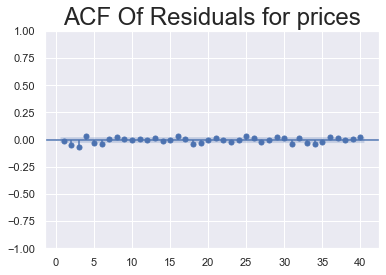

In [96]:
sgt.plot_acf(df.resid1, zero = False, lags = 40)
plt.title("ACF Of Residuals for prices",size=24)
plt.show()

Timeseries is stationary and ACF plot shows there significant correlations ,hence AR(1) model does not explain the whole data

In [97]:
df['res_ret'] = results_ret_ar_6.resid
adfuller_test(df['res_ret'])



parameter,value
Test statistic,-70.7841183616448000
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5019.0000000000000000
1% critical value,-3.4316535759402753
5% critical value,-2.8621160400844468
Maximum likelihood,15692.5708073332430000


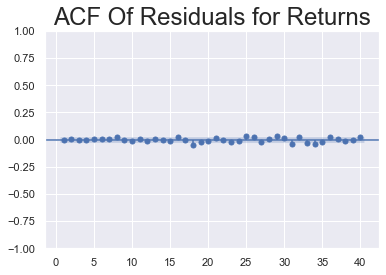

In [98]:

sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [99]:
df['res_ret_2'] = results_ret_ar_2.resid
adfuller_test(df['res_ret_2'])

parameter,value
Test statistic,-12.7829457498683240000
P-value,0.0000000000000000000
No.of lags used in the regression,32.0000000000000000000
total noof observation,4987.0000000000000000000
1% critical value,-3.4316619448857790000
5% critical value,-2.8621197374408225000
Maximum likelihood,15696.6933808783690000000


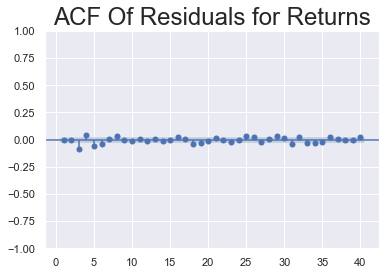

In [100]:
sgt.plot_acf(df.res_ret_2, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## MA model-Non Stationary data

In [ ]:
### definition difference AR vs MA


#### MA(1)

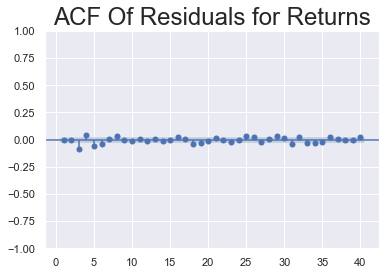

In [101]:
sgt.plot_acf(df.res_ret_2, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [106]:
model_ret_ma_1 = ARIMA(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7928.501
Date:                Mon, 23 May 2022   AIC                          15863.003
Time:                        23:57:15   BIC                          15882.566
Sample:                    01-11-1994   HQIC                         15869.858
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.148      0.251      -0.013       0.051
ma.L1         -0.0258      0.009     -3.021      0.003      -0.042      -0.009
sigma2         1.3792      0.014     99.965      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7846.66
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Higher-Lag MA Models for Returns

In [107]:
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7921.760
Date:                Mon, 23 May 2022   AIC                          15851.521
Time:                        23:57:22   BIC                          15877.605
Sample:                    01-11-1994   HQIC                         15860.661
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.016      1.207      0.227      -0.012       0.049
ma.L1         -0.0327      0.009     -3.764      0.000      -0.050      -0.016
ma.L2         -0.0503      0.008     -6.421      0.0

In [104]:
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0,3,0))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 3, 0)   Log Likelihood              -15471.431
Date:                Mon, 23 May 2022   AIC                          30944.862
Time:                        23:56:31   BIC                          30951.383
Sample:                    01-11-1994   HQIC                         30947.147
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        27.9659      0.290     96.592      0.000      27.398      28.533
Ljung-Box (L1) (Q):                2875.95   Jarque-Bera (JB):              6204.09
Prob(Q):                              0.00   Pr

In [109]:
model_ret_ma_4 = ARIMA(df.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7897.656
Date:                Mon, 23 May 2022   AIC                          15807.312
Time:                        23:57:42   BIC                          15846.438
Sample:                    01-11-1994   HQIC                         15821.022
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.239      0.215      -0.011       0.049
ma.L1         -0.0203      0.009     -2.242      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.840      0.0

In [110]:
model_ret_ma_5 = ARIMA(df.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7891.710
Date:                Mon, 23 May 2022   AIC                          15797.421
Time:                        23:57:55   BIC                          15843.068
Sample:                    01-11-1994   HQIC                         15813.416
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.285      0.199      -0.010       0.048
ma.L1         -0.0262      0.009     -2.841      0.004      -0.044      -0.008
ma.L2         -0.0498      0.008     -6.152      0.0

In [111]:
model_ret_ma_6 = ARIMA(df.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7888.117
Date:                Mon, 23 May 2022   AIC                          15792.234
Time:                        23:58:08   BIC                          15844.402
Sample:                    01-11-1994   HQIC                         15810.515
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.321      0.187      -0.009       0.047
ma.L1         -0.0237      0.009     -2.564      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.987      0.0

In [113]:
model_ret_ma_8 = ARIMA(df.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
#print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7884.499
Date:                Mon, 23 May 2022   AIC                          15788.999
Time:                        23:58:35   BIC                          15854.208
Sample:                    01-11-1994   HQIC                         15811.849
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.256      0.209      -0.011       0.049
ma.L1         -0.0239      0.009     -2.530      0.011      -0.042      -0.005
ma.L2         -0.0496      0.008     -6.058      0.0

In [114]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

0.027

#### Residuals for Returns

In [115]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]


In [116]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is 0.0
The variance of the residuals is 1.356


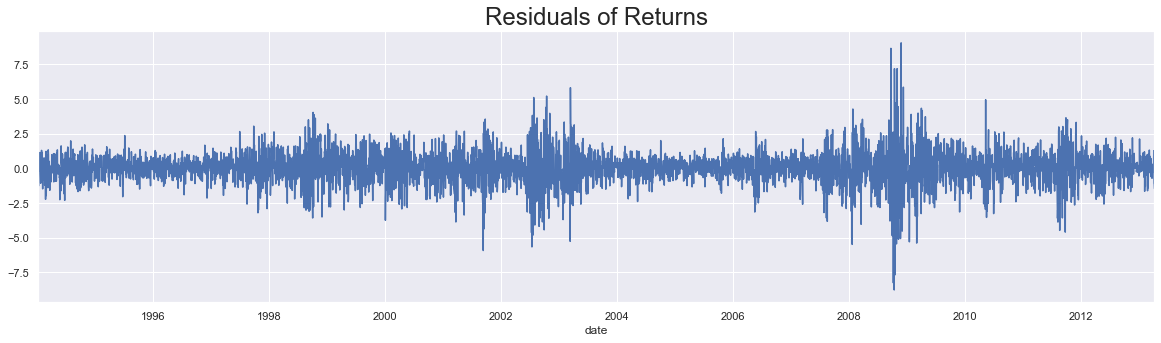

In [117]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [118]:
adfuller_test(df.res_ret_ma_8[2:])

parameter,value
Test statistic,-70.8410575626868800
P-value,0.0000000000000000
No.of lags used in the regression,0.0000000000000000
total noof observation,5017.0000000000000000
1% critical value,-3.4316540958700460
5% critical value,-2.8621162697870046
Maximum likelihood,15681.8541522164030000


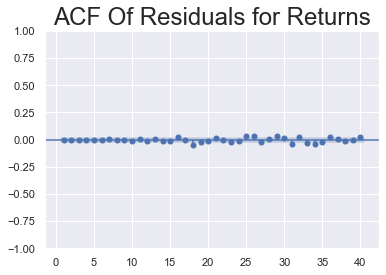

In [119]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()